In [1]:
# import matplotlib as mpl
# mpl.use('Agg')

# import numpy as np  
# import matplotlib.pylab as plt
# import time
# import pickle
# import os
# from sklearn.decomposition import PCA
# import matplotlib.ticker as ticker
# import gpflow

# ############################# PARAMETERS ##############################

# dataDir = "./Data/" ## Data folder
# modelDir = "./Models/" ## Data folder
# plotsDir = "./Plots/allPlots/" ## Data folder

# nRankMax = [2, 4, 8, 12, 16, 32][4]  ## Number of basis vectors in truncated PCA
# ## Increasing nRankMax will increase emulation precision (asymptotically), but reduce the speed

# del_idx = [5, 25, 4, 42]  ## Random holdouts (not used in training, reserved for validation) 

# snap_ID_arr = np.arange(100)

# for snap_ID in snap_ID_arr:


#     ############################# PARAMETERS ##############################

#     dataDir = "./Data/Emulator213bins/" ## Data folder
#     fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'



#     paramIn = dataDir + 'mg.design'


#     az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) 
#     fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'

#     GPmodel = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  
#     PCAmodel = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  
#     print(GPmodel)
#     ################################# I/O #################################
#     loadFile = np.loadtxt(fileIn)
#     PmPl_all = loadFile[:, 1:].T
#     kvals = loadFile[:,0]


#     parameter_array_all = np.loadtxt(paramIn)


#     ############## rescaling ##############


#     def rescale01(f):
#         return np.min(f), np.max(f), (f - np.min(f)) / (np.max(f) - np.min(f))


#     def scale01(fmin, fmax, f):
#         return (f - fmin) / (fmax - fmin)
#     #     return f*(fmax - fmin) + fmin



In [49]:
import numpy as np  
import matplotlib.pylab as plt
import time
import pickle
import os
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker
import gpflow

from matplotlib import gridspec


In [50]:
def modelLoad(nRankMax, snap_ID):
    GPmodel = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  
    PCAmodel = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  

    ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
    saver = gpflow.saver.Saver()
    GPm = saver.load(GPmodel, context=ctx_for_loading)
    GPm.clear()
    GPm.compile()
    PCAm = pickle.load(open(PCAmodel, 'rb'))
    return GPm, PCAm

def GPy_predict(gpmodel, para_array):
    m1p = gpmodel.predict_f(para_array)  # [0] is the mean and [1] the predictive
    W_predArray = m1p[0]
    W_varArray = m1p[1]
    return W_predArray, W_varArray


def Emu(gpmodel, pcamodel, para_array):
    para_array = np.array(para_array)
    if len(para_array.shape) == 1:
        W_predArray, _ = GPy_predict(gpmodel, np.expand_dims(para_array, axis=0))
        x_decoded = pcamodel.inverse_transform(W_predArray)
        return np.squeeze(x_decoded)#[0]


In [51]:
nRankMax = 16
snap_ID = 61
del_idx = [5, 25, 4, 42]  ## Random holdouts (not used in training, reserved for validation) 


dataDir = "./Data/" ## Data folder
modelDir = "./Models/" ## Data folder
plotsDir = "./Plots/allPlots/" ## Data folder



# dataDir = "./Data/Emulator213bins/" ## Data folder
# fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'


az = np.loadtxt(dataDir + 'Emulator213bins/timestepsCOLA.txt', skiprows=1) 
fileIn = dataDir + 'Emulator213bins/ratiosbins_' + str(99) + '.txt'

loadFile = np.loadtxt(fileIn)
PmPl_all = loadFile[:, 1:].T
kvals = loadFile[:,0]

In [52]:


GPmodel = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  
PCAmodel = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  
print(GPmodel, PCAmodel)

./Models/GP_smooth_rank16snap61 ./Models/PCA_smooth_rank16snap61


In [53]:
ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()
m1 = saver.load(GPmodel, context=ctx_for_loading)
m1.clear()
m1.compile()

pca1 = pickle.load(open(PCAmodel, 'rb'))

/Users/nramachandra/anaconda3/envs/env_py37/lib/python3.7/site-packages/gpflow/saver/serializers.py:46: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(pathname_or_file_like) as h5file:
/Users/nramachandra/anaconda3/envs/env_py37/lib/python3.7/site-packages/gpflow/saver/serializers.py:47: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return h5file['data'].value


In [54]:
Emu(m1, pca1, [0.1, 1.0, 0.8, 3e-5, 1.5]) 

array([1.00427621, 1.00496876, 1.00561674, 1.00622163, 1.00678485,
       1.00730788, 1.00779215, 1.00823913, 1.00865026, 1.00902701,
       1.00937081, 1.00968312, 1.0099654 , 1.01021909, 1.01044566,
       1.01064655, 1.01082321, 1.01097709, 1.01110966, 1.01122235,
       1.01131663, 1.01139395, 1.01145575, 1.01150349, 1.01153862,
       1.0115626 , 1.01153696, 1.01150442, 1.0114471 , 1.01149932,
       1.0114678 , 1.01157416, 1.01160849, 1.01156002, 1.01158162,
       1.01168591, 1.01176247, 1.01186308, 1.01193318, 1.01190967,
       1.01194925, 1.01200269, 1.01196797, 1.01208991, 1.0121038 ,
       1.01210179, 1.0121475 , 1.01224137, 1.01227413, 1.01235156,
       1.01247639, 1.01250635, 1.01254103, 1.01255198, 1.01254209,
       1.01263727, 1.01266728, 1.01268188, 1.01263873, 1.01264213,
       1.01249549, 1.01248285, 1.01233581, 1.01237929, 1.01237922,
       1.01227036, 1.01215431, 1.01213373, 1.01199704, 1.01190823,
       1.01172231, 1.01157682, 1.01168006, 1.01152536, 1.01136

0.146 0.120824


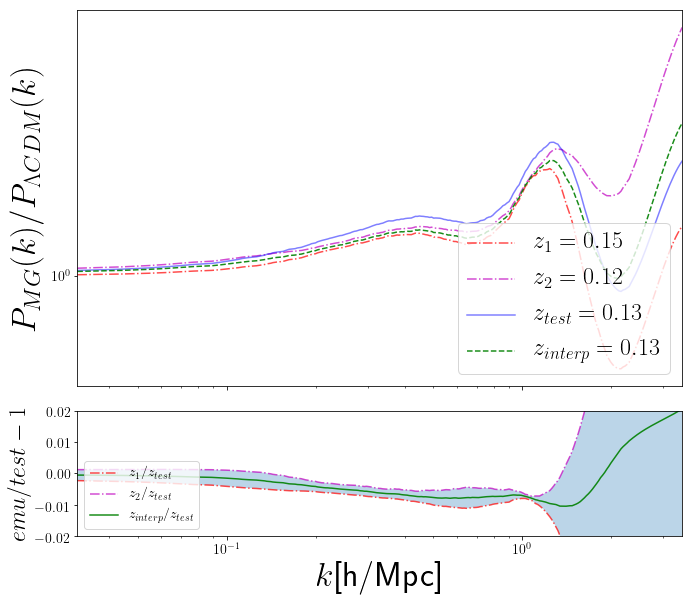

In [55]:
# az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) 
z_all = az[:, 1]


snap_ID_z3 = 87 #### Test redshift
snap_ID_z1 = snap_ID_z3 - 1
snap_ID_z2 = snap_ID_z3 + 1


print(z_all[snap_ID_z1], z_all[snap_ID_z2])


# allLabels = [r'${\Omega}_m$', r'$n_s$', r'${\sigma}_8$', r'$f_{R_0}$', r'$n$']
Om, ns, s8, fR0, n = 0.1, 1.0, 0.8, 3e-5, 1.5


GPmodel_z1 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z1)  
PCAmodel_z1 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z1)  

ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()
GPm1 = saver.load(GPmodel_z1, context=ctx_for_loading)
GPm1.clear()
GPm1.compile()
PCAm1 = pickle.load(open(PCAmodel_z1, 'rb'))

Pk_z1 = Emu(GPm1, PCAm1, [Om, ns, s8, fR0, n])
z1 = z_all[snap_ID_z1]



    
GPmodel_z2 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2)  
PCAmodel_z2 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2)  

ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()
GPm2 = saver.load(GPmodel_z2, context=ctx_for_loading)
GPm2.clear()
GPm2.compile()
PCAm2 = pickle.load(open(PCAmodel_z2, 'rb'))

Pk_z2 = Emu(GPm2, PCAm2, [Om, ns, s8, fR0, n])
z2 = z_all[snap_ID_z2]



GPmodel_z3 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z3)  
PCAmodel_z3 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z3)  

ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()
GPm3 = saver.load(GPmodel_z3, context=ctx_for_loading)
GPm3.clear()
GPm3.compile()
PCAm3 = pickle.load(open(PCAmodel_z3, 'rb'))

Pk_z3 = Emu(GPm3, PCAm3, [Om, ns, s8, fR0, n])
z3 = z_all[snap_ID_z3]






# GPmodel_z2 = '"R_GP_model_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2) +'.RData"'  ## Double and single quotes are necessary
# GP_model_load(GPmodel = GPmodel_z2)
# Pk_z2 = GP_predict([Om, ns, s8, fR0, n])
# z2 = z_all[snap_ID_z2]

# GPmodel_z3 = '"R_GP_model_rank' + str(nRankMax) + 'snap' + str(snap_ID_z3) +'.RData"'  ## Double and single quotes are necessary
# GP_model_load(GPmodel = GPmodel_z3)
# Pk_z3 = GP_predict([Om, ns, s8, fR0, n])
# z3 = z_all[snap_ID_z3]


# plt.plot(Pk_z1)
# plt.plot(Pk_z2)


Pk_interp12 = np.zeros_like(Pk_z1)
# for k_in in range(np.shape(Pk_z1)[0]):
#     xp = [z2, z1]
# #     xp = [1./(1 + z2), 1/(1 + z1)]
# #     xp = [1 + z2, 1 + z1]

# #     fp = [Pk_z2[k_in], Pk_z1[k_in]]
#     fp = [Pk_z2[k_in], Pk_z1[k_in]]

#     Pk_interp12[k_in] = np.interp(z3, xp, fp)

Pk_interp12 = Pk_z2 + (Pk_z1 - Pk_z2)*(z3 - z2)/(z1 - z2)
    
plt.figure(14232, figsize=(12, 10))
plt.rcParams.update({'font.size': 14})


gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.1, left=0.2, bottom=0.15, wspace=0.25)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$',  fontsize = 34)

ax1.set_xlabel(r'$k$[h/Mpc]',  fontsize = 34)
# ax1.axhline(y=0, ls='dashed', color = 'k', alpha = 0.5)


ax0.set_yscale('log')
ax0.set_xscale('log')
ax1.set_xscale('log')

ax1.set_ylabel(r'$emu/test - 1$',  fontsize = 24)
ax1.set_ylim(-2e-2, 2e-2)




ax0.set_xlim(kvals[0], kvals[-1])
ax1.set_xlim(kvals[0], kvals[-1])
ax0.set_xticklabels([])

# ax0.set_xlim(kvals[3], kvals[-5])
# ax1.set_xlim(kvals[3], kvals[-5])



ax0.plot(kvals, Pk_z1, 'r-.', alpha = 0.7, label =  r'$z_1 = %0.2f$'%z1)
ax0.plot(kvals, Pk_z2, 'm-.',  alpha = 0.7, label = r'$z_2 = %0.2f$'%z2)
ax0.plot(kvals, Pk_z3, 'b-',  alpha = 0.5, label = r'$z_{test} = %0.2f$'%z3)
ax0.plot(kvals,Pk_interp12, 'g--',  alpha = 0.9,  lw = 1.5, label = r'$z_{interp} = %0.2f$'%z3)

ax1.plot(kvals, Pk_z1/Pk_z3 - 1, 'r-.',  alpha = 0.7, label = r'$z_1/z_{test}$')
ax1.plot(kvals, Pk_z2/Pk_z3 - 1, 'm-.',  alpha = 0.7, label = r'$z_2/z_{test}$')
ax1.plot(kvals, Pk_interp12/Pk_z3 - 1, 'g-',   alpha = 0.9, lw = 1.5, label = r'$z_{interp}/z_{test}$')


ax1.fill_between(kvals, Pk_z1/Pk_z3 - 1, Pk_z2/Pk_z3 - 1, alpha = 0.3)


start, end = ax0.get_ylim()
# ax0.yaxis.set_ticks((np.arange(start, end, 0.1)))
# ax0.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))

ax0.legend(loc="lower right", fontsize = 24)
ax1.legend(loc="lower left", fontsize = 14)

plt.show()


In [56]:
# az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) 
z_all = az[:, 1]

def Pk_ratio_linearZ(Om, ns, s8, fR0, n, z):
        
    snap_idx_nearest = (np.abs(z_all - z)).argmin()
    if (z > z_all[snap_idx_nearest]): 
        snap_ID_z1 = snap_idx_nearest - 1
        
    else:
        snap_ID_z1 = snap_idx_nearest 
  

    snap_ID_z2 = snap_ID_z1 + 1

    
    
    GPmodel_z1 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z1)  
    PCAmodel_z1 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z1)  
    print(GPmodel_z1)

    ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
    saver = gpflow.saver.Saver()
    GPm1 = saver.load(GPmodel_z1, context=ctx_for_loading)
    GPm1.clear()
    GPm1.compile()
    PCAm1 = pickle.load(open(PCAmodel_z1, 'rb'))

    Pk_z1 = Emu(GPm1, PCAm1, [Om, ns, s8, fR0, n])
    z1 = z_all[snap_ID_z1]



        
    GPmodel_z2 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2)  
    PCAmodel_z2 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2)  

    ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
    saver = gpflow.saver.Saver()
    GPm2 = saver.load(GPmodel_z2, context=ctx_for_loading)
    GPm2.clear()
    GPm2.compile()
    PCAm2 = pickle.load(open(PCAmodel_z2, 'rb'))

    Pk_z2 = Emu(GPm2, PCAm2, [Om, ns, s8, fR0, n])
    z2 = z_all[snap_ID_z2]
    
    
    print('Linear interpolating for redshift')
    print('z1= '+ str(z_all[snap_ID_z1]))
    print('z2= '+ str(z_all[snap_ID_z2]))

    Pk_interp = np.zeros_like(Pk_z1)
    
    Pk_interp = Pk_z2 + (Pk_z1 - Pk_z2)*(z - z2)/(z1 - z2)
#     for k_in in range(np.shape(Pk_z1)[0]):
        
#         xp = [z2, z1]
#         fp = [Pk_z2[k_in], Pk_z1[k_in]]
#         Pk_interp[k_in] = np.interp(z, xp, fp)
    
    return Pk_interp, Pk_z1, Pk_z2

#### check the order of redshift


# Pk_ratio(0.1, 1.0, 0.8, 3e-5, 1.5, 0.6)

In [57]:
# # az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) 
# z_all = az[:, 1]

# def Pk_ratio_splineZ(Om, ns, s8, fR0, n, z):
    
    
#     snap_idx_nearest = (np.abs(z_all - z)).argmin()
#     if (z > z_all[snap_idx_nearest]): 
#         snap_ID_z1 = snap_idx_nearest - 1
        
#     else:
#         snap_ID_z1 = snap_idx_nearest 
  

#     snap_ID_z2 = snap_ID_z1 + 1

    
#     GPmodel_z1 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z1)  
#     PCAmodel_z1 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z1)  

#     ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
#     saver = gpflow.saver.Saver()
#     GPm1 = saver.load(GPmodel_z1, context=ctx_for_loading)
#     GPm1.clear()
#     GPm1.compile()
#     PCAm1 = pickle.load(open(PCAmodel_z1, 'rb'))

#     Pk_z1 = Emu(GPm1, PCAm1, [Om, ns, s8, fR0, n])
#     z1 = z_all[snap_ID_z1]



        
#     GPmodel_z2 = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2)  
#     PCAmodel_z2 = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID_z2)  

#     ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
#     saver = gpflow.saver.Saver()
#     GPm2 = saver.load(GPmodel_z2, context=ctx_for_loading)
#     GPm2.clear()
#     GPm2.compile()
#     PCAm2 = pickle.load(open(PCAmodel_z2, 'rb'))

#     Pk_z2 = Emu(GPm2, PCAm2, [Om, ns, s8, fR0, n])
#     z2 = z_all[snap_ID_z2]
    
    
#     print('Linear interpolating for redshift')
#     print('z1= '+ str(z_all[snap_ID_z1]))
#     print('z2= '+ str(z_all[snap_ID_z2]))

#     Pk_interp = np.zeros_like(Pk_z1)
    
#     Pk_interp = Pk_z2 + (Pk_z1 - Pk_z2)*(z - z2)/(z1 - z2)
#     for k_in in range(np.shape(Pk_z1)[0]):
        
#         xp = [z2, z1]
#         fp = [Pk_z2[k_in], Pk_z1[k_in]]
#         Pk_interp[k_in] = np.interp(z, xp, fp)
    
# #     return Pk_interp, Pk_z1, Pk_z2

# #### check the order of redshift


# # Pk_ratio(0.1, 1.0, 0.8, 3e-5, 1.5, 0.6)

snap ID =  30
z =  2.088327
./Models/GP_smooth_rank16snap30
/Users/nramachandra/anaconda3/envs/env_py37/lib/python3.7/site-packages/gpflow/saver/serializers.py:46: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(pathname_or_file_like) as h5file:
/Users/nramachandra/anaconda3/envs/env_py37/lib/python3.7/site-packages/gpflow/saver/serializers.py:47: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return h5file['data'].value
Linear interpolating for redshift
z1= 2.088327
z2= 1.997603
snap ID =  55
z =  0.758088
./Models/GP_smooth_rank16snap55
Linear interpolating for redshift
z1= 0.758088
z2= 0.72831
snap ID =  80
z =  0.228803
./Models/

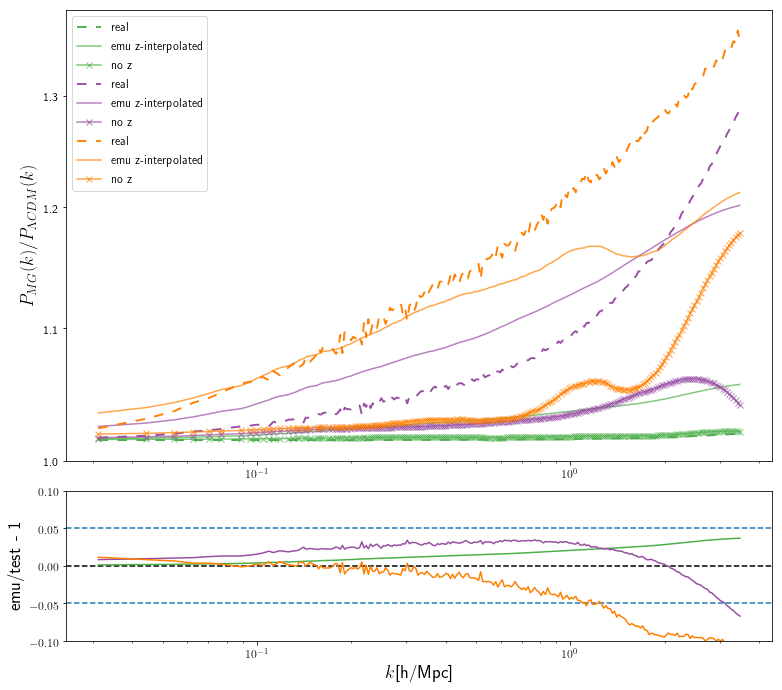

In [59]:
paramIn = dataDir + 'mg.design'
parameter_array_all = np.loadtxt(paramIn)

cosmo_id = del_idx[1]
# cosmo_id = 49

ax0.set_xlim(kvals[0], kvals[-1])
ax1.set_xlim(kvals[0], kvals[-1])

ax0.set_xticklabels([])

plt.rc('text', usetex=True)  # Slower
plt.rc('font', size=12)  # 18 usually

plt.figure(999, figsize=(14, 12))
from matplotlib import gridspec

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.1, left=0.2, bottom=0.15, wspace=0.25)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$',  fontsize = 18)

ax1.axhline(y=-5e-2, ls='dashed')
ax1.axhline(y=5e-2, ls='dashed')

ax1.set_ylim([-0.1, 0.1])

ax1.set_xlabel(r'$k$[h/Mpc]',  fontsize = 18)
ax1.axhline(y=0, ls='dashed', color = 'k')


ax0.set_yscale('log')
ax0.set_xscale('log')
ax1.set_xscale('log')

ax1.set_ylabel(r'emu/test - 1',  fontsize = 18)

# snap_id = 22 ### corresponds to z~3 i think -- check it out 
color_id = 1
for snap_zidx in range(30,99,25):
    z_test = z_all[snap_zidx]
    
    print('snap ID = ', snap_zidx)
    print('z = ', z_test)
    # print('sim ID = ', x_id)

    # fileIn = dataDir + 'ratios_' + str(snap_zidx) + '.txt'
    fileIn = dataDir + 'Emulator213bins/ratiosbins_' + str(snap_zidx) + '.txt'

    loadFile = np.loadtxt(fileIn)
    PmPl_test = loadFile[:, 1:].T

    Cosmo = parameter_array_all[cosmo_id]
#     x_test = PmPl_all[cosmo_id]
    x_test = PmPl_test[cosmo_id]

    emu, emu_z1, emu_z2 = Pk_ratio_linearZ(Cosmo[0], Cosmo[1], Cosmo[2], Cosmo[3], Cosmo[4], z_test)
    
    # GPmodel_z = '"R_GP_model_rank' + str(nRankMax) + 'snap' + str(snap_zidx) +'.RData"'  ## Double and single quotes are necessary
    # GP_model_load(GPmodel = GPmodel_z)
    # emu_noZ = GP_predict(Cosmo)

    GPmodel_z = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_zidx)  
    PCAmodel_z = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_zidx)  

    ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
    saver = gpflow.saver.Saver()
    GPm = saver.load(GPmodel_z, context=ctx_for_loading)
    GPm.clear()
    GPm.compile()
    PCAm = pickle.load(open(PCAmodel_z, 'rb'))

    emu_noZ = Emu(GPm, PCAm, [Om, ns, s8, fR0, n])
    # z2 = z_all[snap_ID_z2]


#     plt.figure(1465, figsize = (10, 8))
    color_id = color_id + 1

    ax0.plot(kvals, x_test, alpha=1.0, ls='--', lw = 1.9, dashes=(5, 5), label='real', color=plt.cm.Set1(color_id))
    
    ax0.plot(kvals, emu, '-', alpha=0.7, label='emu z-interpolated', color=plt.cm.Set1(color_id))
    
    # ax0.plot(kvals, emu_z2, '-.', alpha=0.7, label='emu z2', color=plt.cm.Set1(color_id))

    # ax0.plot(kvals, emu_z1, '-.', alpha=0.7, label='emu z1', color=plt.cm.Set1(color_id))

    ax0.plot(kvals, emu_noZ, 'x-', alpha=0.7, label='no z', color=plt.cm.Set1(color_id))

    ax1.plot(kvals, emu/x_test - 1, color=plt.cm.Set1(color_id))

    print(15*'=')
    
    
    
start, end = ax0.get_ylim()
ax0.yaxis.set_ticks((np.arange(start, end, 0.1)))
ax0.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax0.legend()

plt.show()



In [ ]:
# PmPl_test.shape

In [ ]:
# z_all[20::10]

In [ ]:
# # az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) 
# z = az[:, 1]

# for snap_ID in range(0, 100, 1):
#     GPmodel_z1 = '"R_GP_model_rank' + str(nRankMax) + 'snap' + str(snap_ID) +'.RData"'  ## Double and single quotes are necessary
#     GP_model_load(GPmodel = GPmodel_z1)
#     Pk_z1 = GP_predict([0.1, 1.0, 0.8, 3e-5, 1.5])
    
#     plt.figure(43215)
    
#     plt.plot(Pk_z1[19], z[snap_ID], 'x')
    
# plt.show()

In [ ]:
# z[snap_ID]

In [60]:
Pk_ratio_linearZ(Cosmo[0], Cosmo[1], Cosmo[2], Cosmo[3], Cosmo[4], 0.2)

./Models/GP_smooth_rank16snap81
/Users/nramachandra/anaconda3/envs/env_py37/lib/python3.7/site-packages/gpflow/saver/serializers.py:46: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(pathname_or_file_like) as h5file:
/Users/nramachandra/anaconda3/envs/env_py37/lib/python3.7/site-packages/gpflow/saver/serializers.py:47: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return h5file['data'].value
Linear interpolating for redshift
z1= 0.214181
z2= 0.199904


(array([1.01907376, 1.02305746, 1.02680469, 1.03032379, 1.03362314,
        1.03671109, 1.039596  , 1.04228622, 1.04479012, 1.04711606,
        1.04927239, 1.05126748, 1.05310968, 1.05480735, 1.05636885,
        1.05780254, 1.05911677, 1.06031991, 1.06142032, 1.06242636,
        1.06334637, 1.06418873, 1.06496179, 1.06567391, 1.06633345,
        1.06694877, 1.06742722, 1.06795196, 1.0685501 , 1.06918521,
        1.06976648, 1.07089163, 1.07190108, 1.07308993, 1.07393767,
        1.07478363, 1.0757296 , 1.07664131, 1.0771827 , 1.0779243 ,
        1.07877243, 1.07948551, 1.08021989, 1.0809116 , 1.08164623,
        1.08216734, 1.08312749, 1.08428826, 1.08499769, 1.08582495,
        1.08694549, 1.08796838, 1.08866664, 1.08918403, 1.09028343,
        1.09063681, 1.09185085, 1.09323379, 1.09417118, 1.09493887,
        1.09579696, 1.09673713, 1.09744956, 1.09791543, 1.09884052,
        1.09932666, 1.10026835, 1.10127064, 1.10203754, 1.10248551,
        1.10278361, 1.10356009, 1.10433617, 1.10

In [61]:
Pk_ratio_linearZ(Cosmo[0], Cosmo[1], Cosmo[2], Cosmo[3], Cosmo[4], 0.5)

./Models/GP_smooth_rank16snap64
Linear interpolating for redshift
z1= 0.52207
z2= 0.4997


(array([1.01264098, 1.0153493 , 1.01791289, 1.02033631, 1.02262416,
        1.024781  , 1.02681142, 1.02871999, 1.0305113 , 1.03218991,
        1.0337604 , 1.03522736, 1.03659536, 1.03786898, 1.0390528 ,
        1.04015139, 1.04116934, 1.04211122, 1.0429816 , 1.04378507,
        1.04452621, 1.04520958, 1.04583978, 1.04642137, 1.04695894,
        1.04745706, 1.04776472, 1.04810615, 1.0483221 , 1.04887377,
        1.0493754 , 1.0501027 , 1.05072245, 1.05133931, 1.05178079,
        1.05234395, 1.05273789, 1.0533963 , 1.05369434, 1.05407152,
        1.05444113, 1.05496442, 1.05512598, 1.05549586, 1.05568149,
        1.05587256, 1.05615339, 1.05672832, 1.05709968, 1.05750112,
        1.05830551, 1.05884175, 1.05927669, 1.05964339, 1.06006463,
        1.06035091, 1.06081656, 1.06107683, 1.06120981, 1.06152941,
        1.06172267, 1.06216845, 1.0622409 , 1.06244799, 1.06291791,
        1.06291353, 1.0632675 , 1.06354956, 1.06367317, 1.06373724,
        1.06353719, 1.06350487, 1.06395546, 1.06

In [62]:
# snap_zidx = 32
# fileIn = dataDir + 'ratios_' + str(snap_zidx) + '.txt'
# loadFile = np.loadtxt(fileIn)
# PmPl_test = loadFile[:, 1:].T


# PmPl_test.shape
# # plt.plot(PmPl_test)

In [63]:
# loadFile.shape

In [67]:
def modelLoad(nRankMax, snap_ID):
    GPmodel = modelDir + 'GP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  
    PCAmodel = modelDir + 'PCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  

    ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
    saver = gpflow.saver.Saver()
    GPm = saver.load(GPmodel, context=ctx_for_loading)
    GPm.clear()
    GPm.compile()
    PCAm = pickle.load(open(PCAmodel, 'rb'))

    return GPm, PCAm

In [68]:
def MGemu(Om, ns, s8, fR0, n, z):
        
    snap_idx_nearest = (np.abs(z_all - z)).argmin()
    if (z > z_all[snap_idx_nearest]): 
        snap_ID_z1 = snap_idx_nearest - 1
        
    else:
        snap_ID_z1 = snap_idx_nearest 
    snap_ID_z2 = snap_ID_z1 + 1


    GPm1, PCAm1 = modelLoad(nRankMax, snap_ID_z1)
    Pk_z1 = Emu(GPm1, PCAm1, [Om, ns, s8, fR0, n])
    z1 = z_all[snap_ID_z1]


    GPm2, PCAm2 = modelLoad(nRankMax, snap_ID_z2)
    Pk_z2 = Emu(GPm2, PCAm2, [Om, ns, s8, fR0, n])
    z2 = z_all[snap_ID_z2]
    
    # print('Linear interpolating for redshift between', 'z1= '+ str(z_all[snap_ID_z1]), 'z2= '+ str(z_all[snap_ID_z2]))

    Pk_interp = np.zeros_like(Pk_z1)
    
    Pk_interp = Pk_z2 + (Pk_z1 - Pk_z2)*(z - z2)/(z1 - z2)

    return Pk_interp



In [70]:
Om, ns, s8, fR0, n = 0.1, 1.0, 0.8, 3e-5, 1.5

MGemu(Om=0.1, ns=1.0, s8=0.8, fR0=3e-5, n=1.5, z=0.02)

Linear interpolating for redshift between z1= 0.03029 z2= 0.019991


array([1.00765992, 1.0088824 , 1.01002134, 1.01108021, 1.01206245,
       1.01297153, 1.01381092, 1.01458407, 1.01529445, 1.0159455 ,
       1.0165407 , 1.01708351, 1.01757737, 1.01802576, 1.01843214,
       1.01879996, 1.01913268, 1.01943377, 1.01970668, 1.01995488,
       1.02018183, 1.02039098, 1.02058579, 1.02076973, 1.02094626,
       1.02111884, 1.02129125, 1.02150745, 1.02190258, 1.0220049 ,
       1.02213614, 1.02265642, 1.02318918, 1.02374871, 1.02414526,
       1.0245813 , 1.02509907, 1.02547093, 1.02556506, 1.02597648,
       1.02647479, 1.026804  , 1.02729316, 1.02764825, 1.02811849,
       1.02850589, 1.02907893, 1.02969218, 1.03000498, 1.03045773,
       1.03088826, 1.03137245, 1.03159913, 1.03192888, 1.0326679 ,
       1.03297599, 1.03383508, 1.03471794, 1.03555367, 1.03604795,
       1.03660514, 1.03718702, 1.03782189, 1.03836419, 1.03910928,
       1.03965976, 1.04029974, 1.04107061, 1.04189555, 1.04248605,
       1.04316053, 1.04393349, 1.04459205, 1.04528369, 1.04617